In [1]:
!ls ..

CarND-Camera-Calibration  images  notes  Python  wide_dist_pickle.p


In [1]:
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob

images = glob.glob('../images/GOPR*.jpg')


objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane
for fname in images:
    img = cv2.imread(fname)
    objp = np.zeros((6*8, 3), np.float32)  # The 3 is for each coordinate in x, y and z. 
    objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1, 2) # x, y coordinates

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)  # There are None flags in this example.

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp) ## This object points will be the same for all of the calibration images. Since
        ## They represent a real chessboard. 
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #plt.imshow(img)

In [3]:
# If we start with the previously loaded pickle file.
# dist_pickle = pickle.load( open( "../wide_dist_pickle.p", "rb" ) )
# objpoints = dist_pickle["objpoints"]
# imgpoints = dist_pickle["imgpoints"]

In [4]:
# Read in an image
img = cv2.imread('../images/tests/test_image.png')

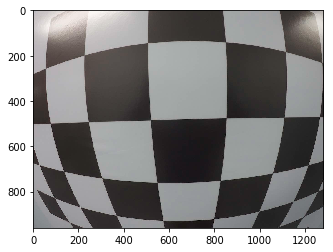

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
# We revert the order of the returned image
gray.shape[::-1]

(1280, 960)

In [8]:
# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # dist stands for distortion coefficients
    # mtx is the camera matrix (needed to transform 3D to 2D)
    # rotation and translation vectors in rvecs and tvecs 
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

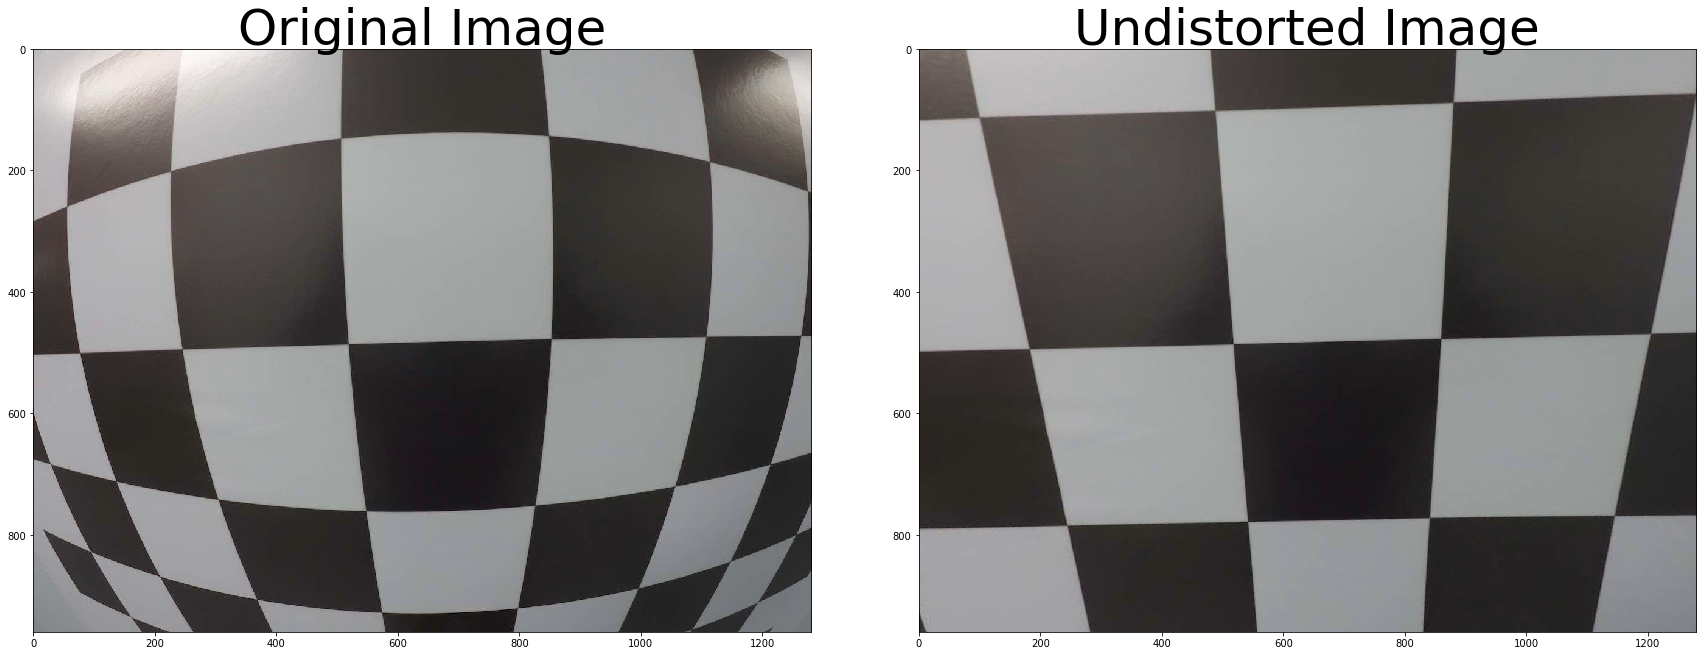

In [9]:
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Undistort and Transform Perspective

In [52]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()

dist_pickle = pickle.load( open( "../wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('../images/tests/test_image_2.jpg')

In [53]:
img.shape

(960, 1280, 3)

In [46]:
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [47]:
# cv2.namedWindow("img")
# cv2.imshow("img", img)
# cv2.waitKey(0)

In [48]:
# cv2.destroyWindow("img")

In [54]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)  
    if ret == True:
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
#         src = np.float32([[ 591.55273438,  287.34643555],
#                           [ 953.65185547,  317.70782471],
#                           [ 605.63696289,  635.89428711],
#                           [ 945.92877197,  571.97467041]] 
#                         )
        offset = 100
        src = np.float32([corners[0], corners[nx-1], corners[-nx], corners[-1]])
        dst = np.float32([[offset, offset],
                          [img.shape[1] - offset, offset],
                          [offset, img.shape[0] - offset],
                          [img.shape[1] - offset, img.shape[0] - offset]])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(img, M, gray.shape[::-1], flags=cv2.INTER_LINEAR)
    return warped, M

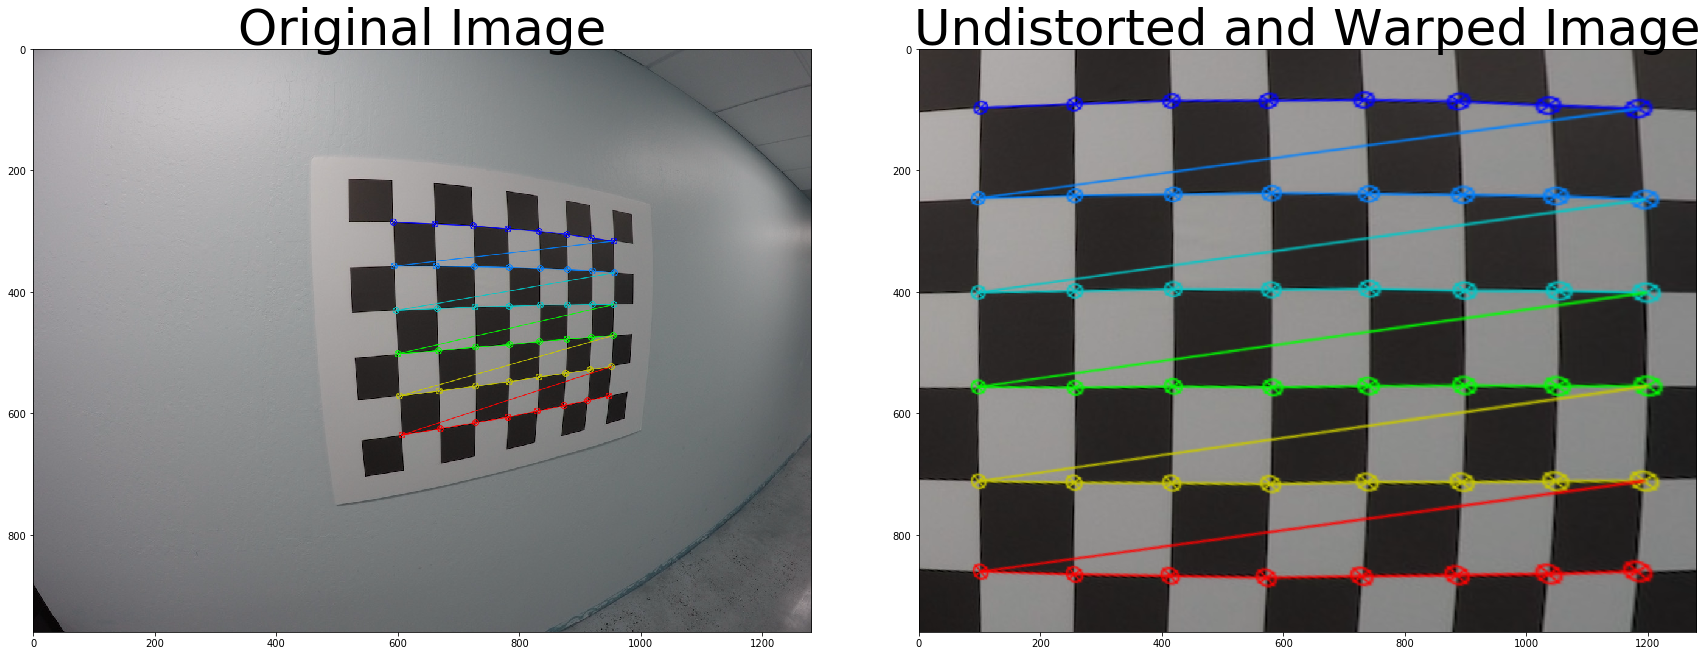

In [55]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
